Campo eléctrico
1. Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:
*a*. Encontrar el campo en un punto producido por dos cargas q1 y q2

b. Emplee el comando plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.

c. Generalice el problema para varios puntos en el espacio.
Se recomienda emplear numpy array.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Campo para una particula
q = -1.6e-19
k = 8.89e9
xy1 = np.array([1, 2])    #Posición de mi particula
xyp = np.array([-1, 0])   #Posición del punto
V = xy1 - xyp      #Vector de la particula al punto
r =  np.sqrt(V[0]**2 + V[1]**2)         #Distancia entre el vector y la particula
r_unit = V/r           #Vector unitario

E= k*abs(q)*r_unit/r**2
print(E)

[1.25723586e-10 1.25723586e-10]


In [ ]:
q1 = 1.6e-19
q2 = 1.6e-19
k = 8.89e9
xy1 = np.array([-5, 0])
xyp = np.array([1, 1])
xy2 = np.array([5, 2])

In [ ]:
def campo_e(xy1, xy2, xyp, q1, q2, k):
  #Campo particula 1
  V1 = xy1 - xyp
  r1 =  np.sqrt(V1[0]**2 + V1[1]**2)
  r_unit = V1/r1
  E1= k*abs(q1)*r_unit/r1**2
  #Campo particula 2
  V2 = xy2 - xyp
  r2 =  np.sqrt(V2[0]**2 + V2[1]**2)
  r_unit = V2/r2
  E2= k*abs(q2)*r_unit/r2**2
  print(E1, E2)
  return E1 + E2

In [ ]:
A = campo_e(xy1, xy2, xyp, q1, q2, k)
A

[-3.79201815e-11 -6.32003026e-12] [8.11723937e-11 2.02930984e-11]


array([4.32522121e-11, 1.39730682e-11])

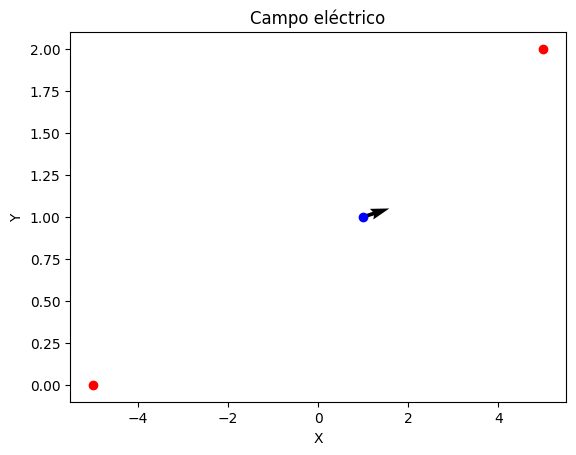

In [ ]:
#Graficamente
plt.figure()
plt.plot(xy1[0], xy1[1], 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Campo eléctrico' )
plt.plot(xy2[0], xy2[1], 'ro')
plt.plot(xyp[0], xyp[1], 'bo')
plt.quiver(xyp[0], xyp[1], A[0], A[1])

In [ ]:
X,Y = np.meshgrid(np.arange(-25,25,0.2), np.arange(-25,25,1))
def campo_e(xy1, xy2, X, Y, q1, q2, k):
  #Campo particula 1
  Vx1, Vy1 = X - xy1[0], Y - xy1[1]
  r1 =  np.sqrt(Vx1**2+Vy1**2)
  r_unitx1, r_unity1 = Vx1/r1, Vy1/r1
  Ex1= k*abs(q1)*r_unitx1/r1**2
  Ey1= k*abs(q1)*r_unity1/r1**2
  #Campo particula 2
  Vx2, Vy2 = X - xy2[0], Y - xy2[1]
  r2 =  np.sqrt(Vx2**2+Vy2**2)
  r_unitx2, r_unity2 = Vx2/r2, Vy2/r2
  Ex2= k*abs(q2)*r_unitx2/r2**2
  Ey2= k*abs(q2)*r_unity2/r2**2
  Ex = Ex1 + Ex2
  Ey = Ey1 + Ey2
  return Ex, Ey

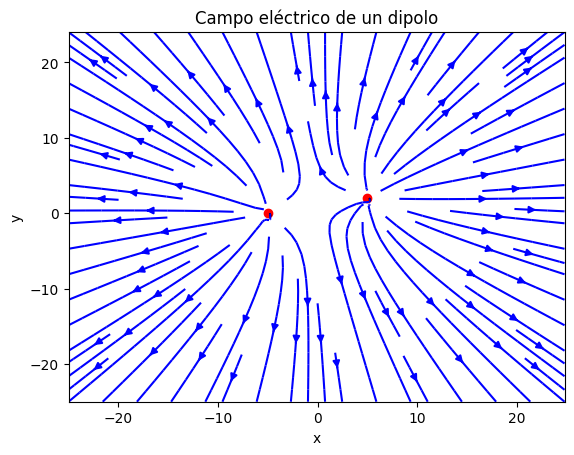

In [ ]:
plt.figure()
plt.plot(xy2[0], xy2[1], 'ro')
plt.plot(xy1[0], xy1[1], 'ro')
plt.streamplot(X,Y,Ex,Ey,color='b') # Cambiado
plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo eléctrico de un dipolo")
plt.show()

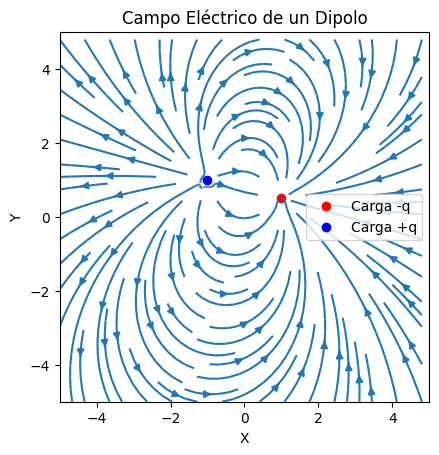

In [ ]:
q1 = 1.6e-19
q2 = -1.6e-19
k = 8.89e9
xy1 = np.array([-1, 1])
xy2 = np.array([1, 0.5])
X, Y = np.meshgrid(np.arange(-5,5,0.2), np.arange(-5,5,0.2))

def campo_e(xy, X, Y, q, k):
    Vx, Vy = X - xy[0], Y - xy[1]
    r = np.sqrt(Vx**2 + Vy**2)
    r_hat_x, r_hat_y = Vx/r, Vy/r
    E_magnitud = k * q / r**2
    Ex = E_magnitud * r_hat_x
    Ey = E_magnitud * r_hat_y
    return Ex, Ey

Ex1, Ey1 = campo_e(xy1, X, Y, q1, k)
Ex2, Ey2 = campo_e(xy2, X, Y, q2, k)

Ex_total = Ex1 + Ex2
Ey_total = Ey1 + Ey2

plt.plot(xy2[0], xy2[1], 'ro', label='Carga -q')
plt.plot(xy1[0], xy1[1], 'bo', label='Carga +q')
plt.streamplot(X, Y, Ex_total, Ey_total)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Campo Eléctrico de un Dipolo')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
